In [ ]:
from web3 import Web3
import os
from solcx import compile_source, install_solc
import solcx
from solcx import compile_source
import math
# w3 = Web3(Web3.HTTPProvider("http://143.215.130.235:8545"))
# chainId=9090
w3 = Web3(Web3.HTTPProvider("http://127.0.0.1:8545"))
chainId=1337
exploit_address = ''#TODO: Place the deployed address from deploy.ipynb here

solcx.install_solc('0.5.17')
gas_limit = 8000000
chainId=9090

with open("ShibaPayment.sol") as f:
    contract_source = f.read()
compiled_sol = compile_source(contract_source, solc_version="0.5.17")
contract_interface = compiled_sol[f'<stdin>:ShibaPayment']
abi = contract_interface['abi']
contract = w3.eth.contract(abi=contract_interface['abi'],
                           bytecode=contract_interface['bin'])


deployed_contract = w3.eth.contract(address=exploit_address, abi=contract_interface['abi'])


In [ ]:

YOUR_SK = "" #TODO: Place your SK here
YOUR_PK = '' #TODO: Place your PK here
val = 20 #TODO: use min 20 buzz

account = w3.eth.account.from_key(YOUR_SK)

tx_hash = deployed_contract.functions.pay().build_transaction({
    'from': account.address,
    'gas': gas_limit, 
    'nonce': w3.eth.get_transaction_count(account.address),
    'gasPrice': math.floor(w3.eth.gas_price*1.1),
    'value': w3.to_wei(val, 'ether'),
    'chainId': chainId,
})
# Sign and send deployment transaction
signed_tx = w3.eth.account.sign_transaction(tx_hash, YOUR_SK)
raw_tx = getattr(signed_tx, 'rawTransaction', None) or getattr(signed_tx, 'raw_transaction')
tx_hash = w3.eth.send_raw_transaction(raw_tx)
tx_receipt = w3.eth.wait_for_transaction_receipt(tx_hash)
print(tx_hash.hex(), tx_receipt)
print("=========================================================================================================")


feb8f62a07b5760cf7afa34872aa6b34287f4322311e9d406b2c7c559b83a3c1 AttributeDict({'blockHash': HexBytes('0xed22417fca7553a80def50f940260b60c21b5656be2a26c6b021a540b4934a90'), 'blockNumber': 391868, 'contractAddress': None, 'cumulativeGasUsed': 204566, 'effectiveGasPrice': 11000000000, 'from': '0x243fC0B2983C3a628DBC1c54c302D149EeD2FCf6', 'gasUsed': 204566, 'logs': [AttributeDict({'address': '0xb910CF7518DA19153B26a4aB25c7f9737bdEf48d', 'topics': [HexBytes('0xece9b17f57d3629d3623b8c0a5b0019ded57edf92d81801c66ab49a34c5bb7d3'), HexBytes('0x000000000000000000000000243fc0b2983c3a628dbc1c54c302d149eed2fcf6')], 'data': HexBytes('0x000000000000000000000000000000000000000000000001158e460913d000008d08b81e1245373655c0f2bbecc47cb58e187054aa2fdd5c13e572e5ddccf9bd0000000000000000000000000000000000000000000000000000000000000000'), 'blockNumber': 391868, 'transactionHash': HexBytes('0xfeb8f62a07b5760cf7afa34872aa6b34287f4322311e9d406b2c7c559b83a3c1'), 'transactionIndex': 0, 'blockHash': HexBytes('0xed22

In [110]:

payment = deployed_contract.functions.getPaymentDetails(account.address, 0).call({'from': YOUR_PK})
sender, fee, tokenId, status, url = payment

print(f"Payment details:")
print(f"Sender: {YOUR_PK}")
print(f"Fee: {w3.from_wei(fee, 'ether')} ETH")
print(f"TokenId: {tokenId.hex()}")
print(f"Status: {'Processed' if status == 1 else 'Unprocessed'}")
print(f"url: {url}")

# Get current token counter
counter = deployed_contract.functions._tokenIdCounter().call()
print(f"\nCurrent token counter: {counter}")



Payment details:
Sender: 0x243fC0B2983C3a628DBC1c54c302D149EeD2FCf6
Fee: 20 ETH
TokenId: 8d08b81e1245373655c0f2bbecc47cb58e187054aa2fdd5c13e572e5ddccf9bd
Status: Unprocessed
url: 

Current token counter: 3


In [65]:
# Wait a few minutes... 

Payment details:
Sender: 0x243fC0B2983C3a628DBC1c54c302D149EeD2FCf6
Fee: 20 ETH
TokenId: 8d08b81e1245373655c0f2bbecc47cb58e187054aa2fdd5c13e572e5ddccf9bd
Status: Processed
url: https://indigo-rapid-swan-980.mypinata.cloud/ipfs/QmTUoZiRdh6t24xzEVA5az5snAb8wYqSev9BCk1DponBDp


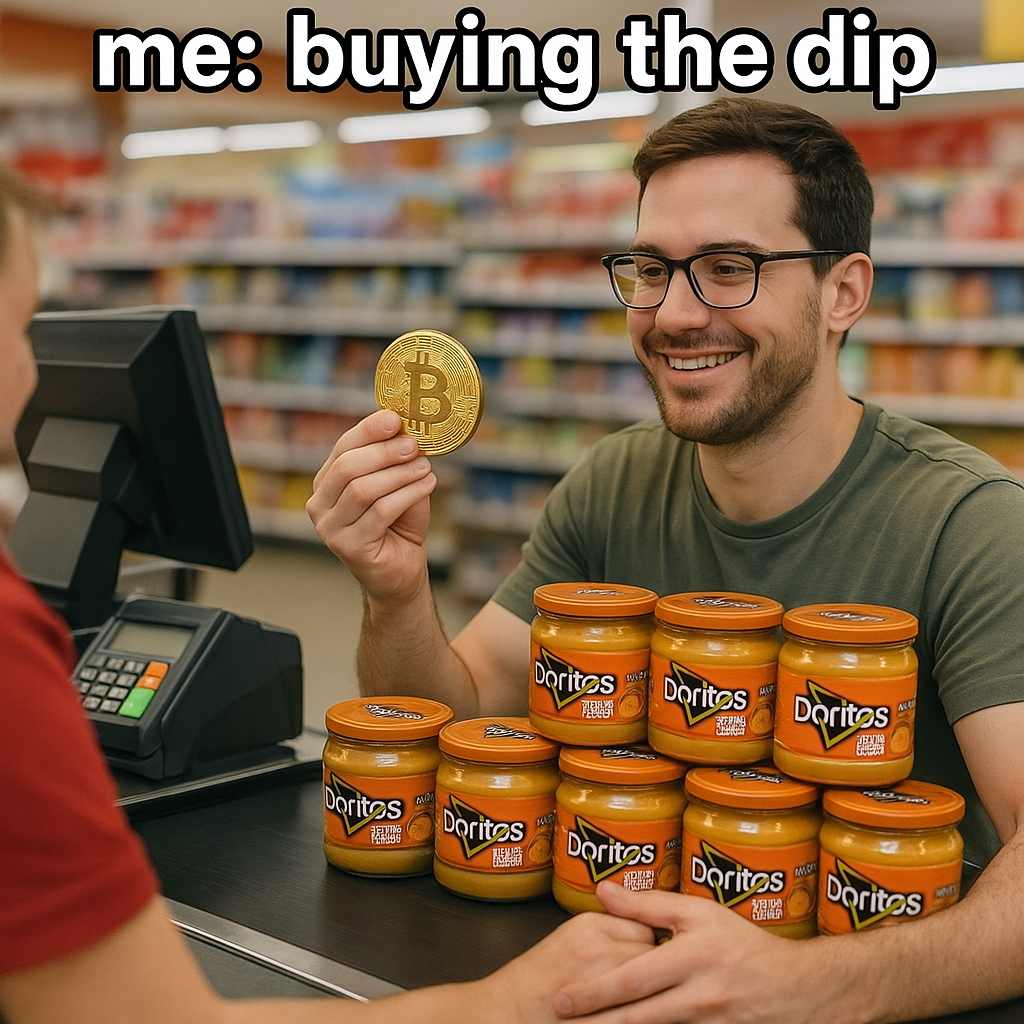

In [111]:

payment = deployed_contract.functions.getPaymentDetails(account.address, 0).call({'from': YOUR_PK})
sender, fee, tokenId, status, url = payment

print(f"Payment details:")
print(f"Sender: {YOUR_PK}")
print(f"Fee: {w3.from_wei(fee, 'ether')} ETH")
print(f"TokenId: {tokenId.hex()}")
print(f"Status: {'Processed' if status == 1 else 'Unprocessed'}")
print(f"url: {url}")

from PIL import Image
import requests
from io import BytesIO

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.show()
